Enter the data directory: ./


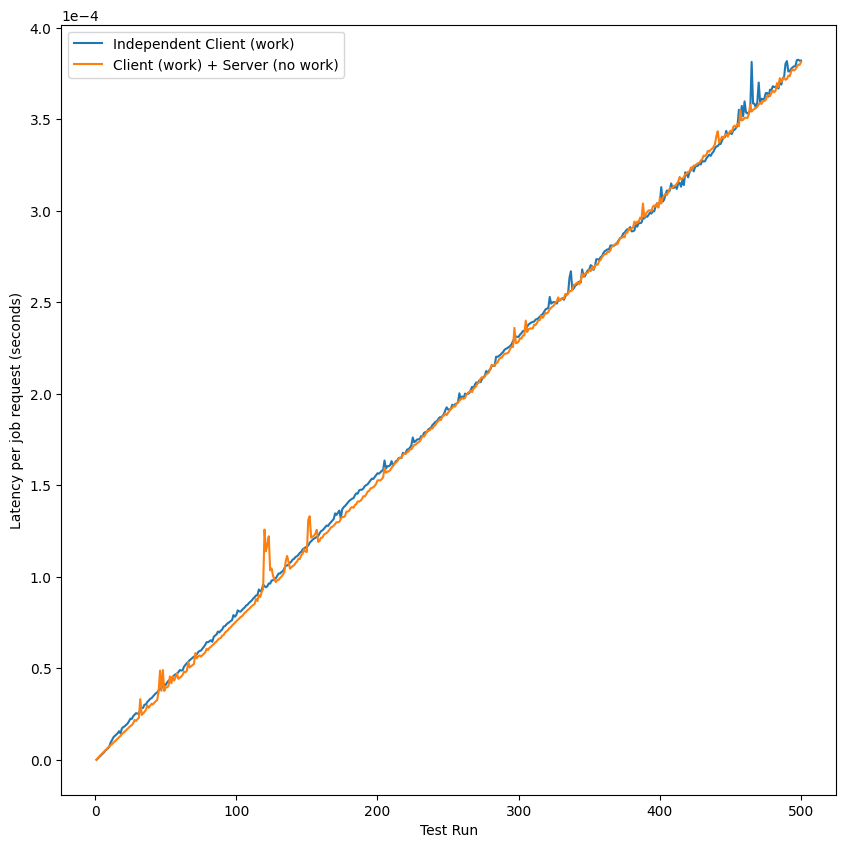

In [4]:
import pandas as pd
import matplotlib.pyplot as mp
import os

RECORDED_APPROACHES = []

def normalize_time_data(data, iterations):
    result = []
    for elem in data:
        result.append(float(elem) / float(iterations))
        
    return result
    
def extract_time_data(filename: str):
    with open(filename, 'r') as f:
        data = f.read().splitlines()
        time_data = []
        iteration_indices = []

        iteration_idx = 1
        for entry in data:
            elems = entry.split()
            if (len(elems) < 2) or (elems[0] != 'Time'):
                continue

            time_data.append(elems[2])
            iteration_indices.append(iteration_idx)

            iteration_idx += 1

        normalized_time_data = normalize_time_data(time_data, len(time_data))
        return (iteration_indices, normalized_time_data)
    
def create_csv(data_dir: str) -> None:
    all_time_data = {}
    
    if os.path.isfile('{}/approach1_log.txt'.format(data_dir)):
        all_time_data['Independent Client (work)'] = extract_time_data('{}/approach1_log.txt'.format(data_dir))
        RECORDED_APPROACHES.append('Independent Client (work)')
    
    if os.path.isfile('{}/approach2_log.txt'.format(data_dir)):
        all_time_data['Client (work) + Server (no work)'] = extract_time_data('{}/approach2_log.txt'.format(data_dir))
        RECORDED_APPROACHES.append('Client (work) + Server (no work)')
        
    if os.path.isfile('{}/approach3_log.txt'.format(data_dir)):
        all_time_data['Client (no work) + Server (work)'] = extract_time_data('{}/approach3_log.txt'.format(data_dir))
        RECORDED_APPROACHES.append('Client (no work) + Server (work)')
        
    if os.path.isfile('{}/approach4_log.txt'.format(data_dir)):
        all_time_data['Client (no work) + Elevated Server (work)'] = extract_time_data('{}/approach4_log.txt'.format(data_dir))
        RECORDED_APPROACHES.append('Client (no work) + Elevated Server (work)')
        
    with open('{}/results.csv'.format(data_dir), 'w') as f:
        f.write('Iteration,')
        f.write(','.join(all_time_data.keys()))
        f.write('\n')
        
        iterations = list(all_time_data.values())[0][0]
        for i in iterations:
            f.write(str(i))
            f.write(',')
            
            for j in range(len(all_time_data)):
                approach = list(all_time_data.keys())[j]
                approach_data = all_time_data[approach]
                time_data = approach_data[1]
                f.write(str(time_data[i - 1]))
                if j == (len(all_time_data) - 1):
                    f.write('\n')
                else:
                    f.write(',')

        
data_dir = input('Enter the data directory: ')
create_csv(data_dir)
csv_data = pd.read_csv('{}/results.csv'.format(data_dir))

# Form dataframe from data
columns = ['Iteration']
for a in RECORDED_APPROACHES:
    columns.append(a)

df = pd.DataFrame(csv_data, columns=columns)

# Plot multiple columns such as population and year from dataframe
df.plot(x='Iteration', y=RECORDED_APPROACHES, kind="line", figsize=(10, 10))

# Display plot
mp.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
mp.ylabel('Latency per job request (seconds)')
mp.xlabel('Test Run')
mp.show()